In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Fake stars

In [55]:
glob = pd.read_csv('test_models/dwarfs_sun_partial_pool_test/global_results.csv', index_col='hparam')
stars = pd.read_csv('test_models/dwarfs_sun_partial_pool_test/stars_results.csv')
sun = pd.read_csv('test_models/dwarfs_sun_partial_pool_test/sun_results.csv', index_col='sparam')

In [56]:
stars.head()

,f_age_true,mass_true,mh_true,mlt_true,y_true,age_true,teff_true,rad_true,dnu_true,smh_true,...,teff_16%,teff_84%,teff_mean,teff_median,teff_sd,y_16%,y_84%,y_mean,y_median,y_sd
0,0.616606,1.128513,0.114768,2.022530,0.263011,3.468979,5992.214377,1.200134,109.727322,0.035414,...,5948.577,6049.934,5999.277,5999.423,51.080,0.265,0.283,0.274,0.272,0.011
1,1.029084,1.001843,0.054680,2.080873,0.261545,9.027707,5779.595263,1.264402,96.152508,-0.041356,...,5707.550,5803.423,5755.482,5755.266,48.564,0.260,0.277,0.268,0.268,0.011
2,0.854841,1.102624,-0.207854,1.982882,0.259495,3.795111,6236.140363,1.367864,88.126970,-0.508203,...,6159.112,6242.423,6200.582,6200.382,41.183,0.253,0.265,0.259,0.259,0.008
3,0.391100,1.104869,-0.163435,1.968826,0.269280,1.666407,6291.780155,1.171219,111.029219,-0.308343,...,6237.337,6336.768,6287.372,6287.340,50.259,0.253,0.266,0.260,0.259,0.009
4,0.332204,0.914187,-0.395980,1.899260,0.252686,2.936308,5897.116089,0.916291,146.644416,-0.465644,...,5856.286,5969.973,5911.663,5909.829,56.530,0.249,0.261,0.255,0.254,0.008


In [57]:
stars.columns

Index(['f_age_true', 'mass_true', 'mh_true', 'mlt_true', 'y_true', 'age_true',
       'teff_true', 'rad_true', 'dnu_true', 'smh_true', 'lum_true', 'obs_teff',
       'obs_teff_err', 'obs_lum', 'obs_lum_err', 'obs_dnu', 'obs_dnu_err',
       'obs_smh', 'obs_smh_err', 'age_16%', 'age_84%', 'age_mean',
       'age_median', 'age_sd', 'dnu_16%', 'dnu_84%', 'dnu_mean', 'dnu_median',
       'dnu_sd', 'f_age_16%', 'f_age_84%', 'f_age_mean', 'f_age_median',
       'f_age_sd', 'lum_16%', 'lum_84%', 'lum_mean', 'lum_median', 'lum_sd',
       'mass_16%', 'mass_84%', 'mass_mean', 'mass_median', 'mass_sd', 'mh_16%',
       'mh_84%', 'mh_mean', 'mh_median', 'mh_sd', 'mlt_16%', 'mlt_84%',
       'mlt_mean', 'mlt_median', 'mlt_sd', 'rad_16%', 'rad_84%', 'rad_mean',
       'rad_median', 'rad_sd', 'smh_16%', 'smh_84%', 'smh_mean', 'smh_median',
       'smh_sd', 'teff_16%', 'teff_84%', 'teff_mean', 'teff_median', 'teff_sd',
       'y_16%', 'y_84%', 'y_mean', 'y_median', 'y_sd'],
      dtype='object')

Compute z

In [61]:
zx_sun = 0.0181

zx = 10.0**stars['mh_mean'] * zx_sun
zx_sd = stars['mh_sd'] * zx * np.log(10.)

stars['z_mean'] = (1.0 - stars['y_mean']) / (1.0 + 1.0/zx)
stars['z_sd'] = np.sqrt(stars['y_sd']**2 + \
                        zx_sd**2 * (1 - stars['y_mean'])**2 / zx**4 / (1 + 1.0/zx)**2) / (1 + 1.0/zx)

In [62]:
glob.head()

,mean,sd,median,16%,84%
hparam,,,,,
dydz,1.395,0.317,1.379,1.100,1.701
y0,0.247,0.000,0.247,0.247,0.247
sigma_y,0.006,0.005,0.005,0.002,0.010
mu_mlt,1.952,0.047,1.953,1.913,1.992
sigma_mlt,0.065,0.044,0.054,0.025,0.104


In [63]:
dydz = 1.5
sigma_y = 0.005
yp = 0.2467

z = np.linspace(0.005, 0.035, 10)
y = yp + dydz * z
y_l = y - sigma_y
y_u = y + sigma_y

y_mod = glob.loc['y0', 'mean'] + glob.loc['dydz', 'mean'] * z
y_mod_l = y_mod - glob.loc['sigma_y', 'mean']
y_mod_u = y_mod + glob.loc['sigma_y', 'mean']

Sun

In [64]:
zx = 10.0**sun.loc['mh_sun', 'mean'] * zx_sun
zx_sd = sun.loc['mh_sun', 'sd'] * zx * np.log(10.)

sun.loc['z_sun', 'mean'] = (1.0 - sun.loc['y_sun', 'mean']) / (1.0 + 1.0/zx)
sun.loc['z_sun', 'sd'] = np.sqrt(sun.loc['y_sun', 'sd']**2 + \
                                 zx_sd**2 * (1 - sun.loc['y_sun', 'mean'])**2 / \
                                 zx**4 / (1 + 1.0/zx)**2) / (1 + 1.0/zx)

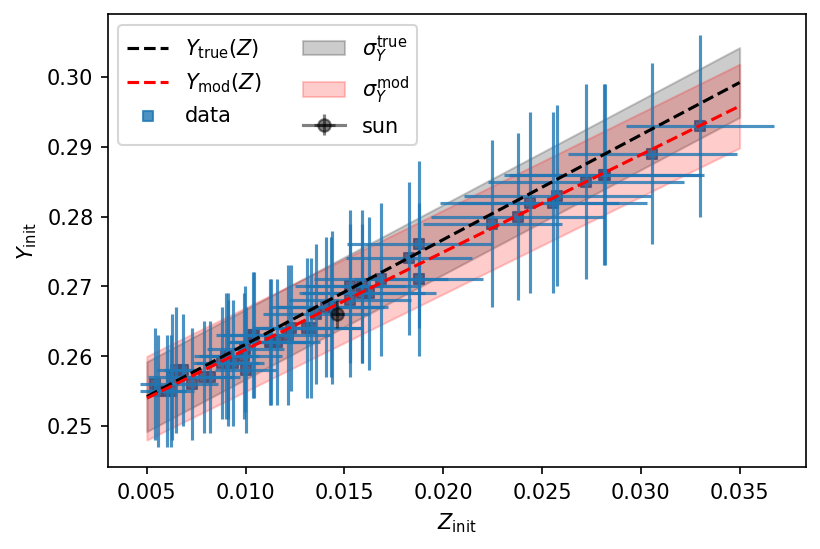

In [65]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)

stars.plot(ax=ax, kind='scatter', marker='s', alpha=0.8, facecolor='none',
           x='z_mean', y='y_mean', xerr='z_sd', yerr='y_sd', label='data')

ax.errorbar(sun.loc['z_sun', 'mean'], sun.loc['y_sun', 'mean'],
            xerr=sun.loc['z_sun', 'sd'], yerr=sun.loc['y_sun', 'sd'], 
            color='k', marker='o', alpha=0.5, label='sun')

ax.plot(z, y, 'k--', label=r'$Y_\mathrm{true}(Z)$')
ax.fill_between(z, y_u, y_l, color='k', alpha=0.2, label=r'$\sigma_Y^\mathrm{true}$')

ax.plot(z, y_mod, 'r--', label=r'$Y_\mathrm{mod}(Z)$')
ax.fill_between(z, y_mod_u, y_mod_l, color='r', alpha=0.2, label=r'$\sigma_Y^\mathrm{mod}$')

ax.set_xlabel(r'$Z_\mathrm{init}$')
ax.set_ylabel(r'$Y_\mathrm{init}$')

plt.legend(ncol=2)

Real stars

In [66]:
glob = pd.read_csv('../preliminary-modelling/real_models/dydz_grid2+sun_new/global_results.csv', index_col=0)
stars = pd.read_csv('../preliminary-modelling/real_models/dydz_grid2+sun_new/results.csv')
sun = pd.read_csv('../preliminary-modelling/real_models/dydz_grid2+sun_new/solar_results.csv', index_col=0)

In [67]:
glob.head()

,mean,sd,median,5%,16%,84%,95%
dydz,1.860054,0.265724,1.861053,1.431012,1.601433,2.117879,2.292902
y0,0.246697,0.000196,0.246698,0.246375,0.246499,0.246891,0.247020
sigma_y,0.006756,0.003334,0.006308,0.002118,0.003515,0.009921,0.012737
mlt,1.887448,0.019776,1.886990,1.855176,1.867698,1.908074,1.920253


In [68]:
print('Length = ', len(stars))
stars.head()

Length =  26


,input_index,KIC,numax,enumax,Dnu,eDnu,Length,HBR,Teff_SDSS,eTeff_SDSS,...,feh_16%,feh_84%,feh_95%,y_mean,y_sd,y_median,y_5%,y_16%,y_84%,y_95%
0,12,3223000,2573.222,563.234,110.919,1.662,32.4,1.102,6198.0,47.0,...,-0.323,0.094,0.168,0.273,0.014,0.271,0.252,0.259,0.287,0.298
1,13,3241581,2807.592,395.565,123.412,2.821,30.0,1.105,5770.0,81.0,...,-0.216,0.290,0.382,0.283,0.018,0.281,0.256,0.264,0.303,0.314
2,16,3427720,2726.381,56.767,120.045,0.120,963.8,1.125,6023.0,51.0,...,-0.254,0.236,0.336,0.280,0.017,0.277,0.255,0.262,0.299,0.311
3,28,3656476,1932.400,23.744,93.305,0.079,783.3,1.371,5684.0,56.0,...,-0.060,0.358,0.426,0.290,0.017,0.290,0.262,0.271,0.309,0.317
4,77,5253542,2393.144,147.551,108.071,1.821,31.0,1.108,5770.0,96.0,...,-0.147,0.331,0.413,0.287,0.018,0.287,0.258,0.266,0.308,0.316


In [69]:
zx_sun = 0.02293

zx = 10.0**stars['feh_mean'] * zx_sun
zx_sd = stars['feh_sd'] * zx * np.log(10.)

stars['z_mean'] = (1.0 - stars['y_mean']) / (1.0 + 1.0/zx)
stars['z_sd'] = np.sqrt(stars['y_sd']**2 + \
                        zx_sd**2 * (1 - stars['y_mean'])**2 / zx**4 / (1 + 1.0/zx)**2) / (1 + 1.0/zx)

In [70]:
y_mod = glob.loc['y0', 'mean'] + glob.loc['dydz', 'mean'] * z
y_mod_l = y_mod - glob.loc['sigma_y', 'mean']
y_mod_u = y_mod + glob.loc['sigma_y', 'mean']

In [71]:
zx = 10.0**sun.loc['feh_sun', 'mean'] * zx_sun
zx_sd = sun.loc['feh_sun', 'sd'] * zx * np.log(10.)

sun.loc['z_sun', 'mean'] = (1.0 - sun.loc['y_sun', 'mean']) / (1.0 + 1.0/zx)

sun.loc['z_sun', 'sd'] = np.sqrt(sun.loc['y_sun', 'sd']**2 + \
                                 zx_sd**2 * (1 - sun.loc['y_sun', 'mean'])**2 / \
                                 zx**4 / (1 + 1.0/zx)**2) / (1 + 1.0/zx)

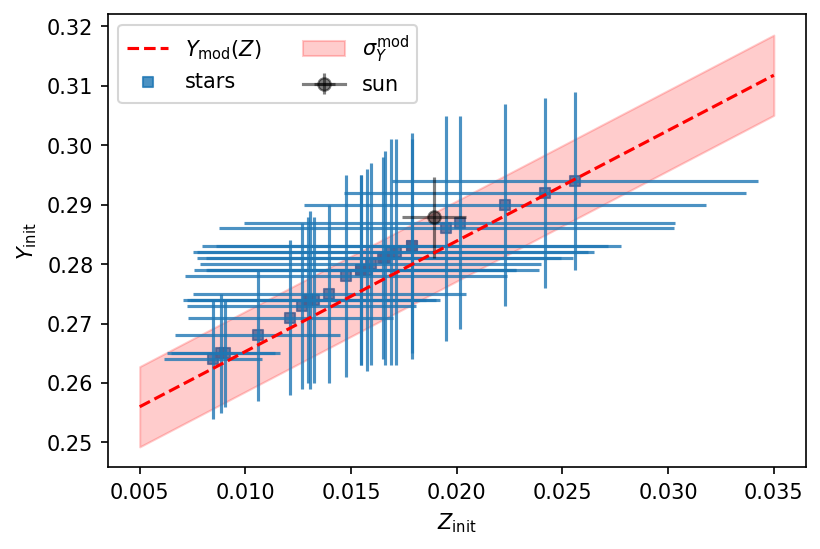

In [72]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)

stars.plot(ax=ax, kind='scatter', marker='s', alpha=0.8, facecolor='none',
           x='z_mean', y='y_mean', xerr='z_sd', yerr='y_sd', label='stars')

ax.errorbar(sun.loc['z_sun', 'mean'], sun.loc['y_sun', 'mean'],
            xerr=sun.loc['z_sun', 'sd'], yerr=sun.loc['y_sun', 'sd'], 
            color='k', marker='o', alpha=0.5, label='sun')

ax.plot(z, y_mod, 'r--', label=r'$Y_\mathrm{mod}(Z)$')
ax.fill_between(z, y_mod_u, y_mod_l, color='r', alpha=0.2, label=r'$\sigma_Y^\mathrm{mod}$')

ax.set_xlabel(r'$Z_\mathrm{init}$')
ax.set_ylabel(r'$Y_\mathrm{init}$')

plt.legend(ncol=2)